<a href="https://colab.research.google.com/github/sayoeweje/20440-Project/blob/Ana_Test/Drive_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install biopython

     |████████████████████████████████| 2.3 MB 22.5 MB/s 


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 49695.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 49727.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 49755.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 49757.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 49806.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 49838.
  PDBC

Cas9 Residue <Residue ARG het=  resseq=307 icode= >: This residue appears to be missing
Cas9 Residue <Residue ARG het=  resseq=307 icode= >: This residue appears to be missing
Cas9 Residue <Residue ARG het=  resseq=307 icode= >: This residue appears to be missing
Cas9 Residue <Residue ARG het=  resseq=307 icode= >: This residue appears to be missing
Cas9 Residue <Residue ARG het=  resseq=307 icode= >: This residue appears to be missing
Cas9 Residue <Residue ARG het=  resseq=307 icode= >: This residue appears to be missing
Cas9 Residue <Residue VAL het=  resseq=713 icode= >: This residue appears to be missing
Cas9 Residue <Residue VAL het=  resseq=713 icode= >: This residue appears to be missing
Cas9 Residue <Residue VAL het=  resseq=713 icode= >: This residue appears to be missing
Cas9 Residue <Residue VAL het=  resseq=713 icode= >: This residue appears to be missing
Cas9 Residue <Residue THR het=  resseq=769 icode= >: This residue appears to be missing
Cas9 Residue <Residue THR het=  

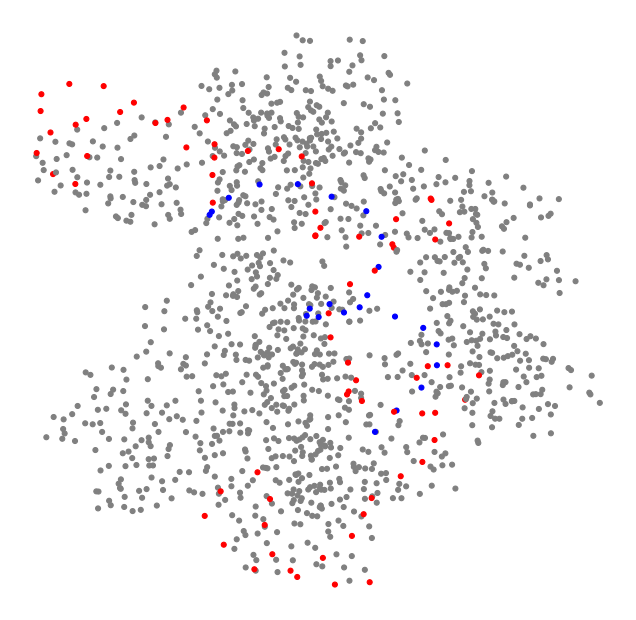

In [7]:
import scipy as sp
from pylab import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import networkx as nx
import seaborn as sns
import pandas as pd
import collections
from IPython.display import clear_output
import random
from Bio.PDB.PDBParser import PDBParser
from mpl_toolkits.mplot3d import Axes3D

parser = PDBParser()
structure_id = "Cas9"
filename = "/content/drive/MyDrive/4oo8.pdb"
structure = parser.get_structure(structure_id, filename)

model = structure[0]
protein = model["A"]
guide = model["B"]
target_DNA = model["C"]

graph = nx.Graph()
for i in range(len(protein)):
    try:
        residue = protein[i+3]
        ca = residue["CA"].get_vector()
        graph.add_node(residue.get_resname()+str(i), pos=(ca[0], ca[1]), color='gray')
    except:
        print("Cas9 Residue "+ str(residue) + ": This residue appears to be missing")
        
for j in range(len(guide)):
    try:
        nucleotide = guide[j+1]
        p = nucleotide["P"].get_vector()
        graph.add_node(residue.get_resname()+str(j), pos=(p[0], p[1]), color='red')
    except:
        print("sgRNA Base "+ str(nucleotide) + ": This base appears to be missing")

for k in range(len(target_DNA)):
    try:
        nucleotide = guide[k+1]
        p = nucleotide["P"].get_vector()
        graph.add_node(residue.get_resname()+str(k), pos=(p[0], p[1]), color='blue')
    except:
        print("Target DNA Base Pair "+ str(nucleotide) + ": This base appears to be missing")

fig = figure(num=1, figsize=(10, 10), dpi=80)
ax  = fig.add_subplot(111)
pos = nx.get_node_attributes(graph,'pos')
color = nx.get_node_attributes(graph, 'color')
g = nx.draw_networkx(graph, pos, node_size = 20, with_labels = False, node_color = color.values())
ax.set_axis_off()
